# 4.3 - Dropout, pooling

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

/content/init.py:2: SyntaxWarning: invalid escape sequence '\S'
  course_id = '\S*deeplearning\S*'


replicating local resources


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

'2.19.0'

## Dropout

Dropout is a sort of **regularization** See

- [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
- [An intuitive explanation of dropout](https://towardsdatascience.com/an-intuitive-explanation-to-dropout-749c7fb5395c)

We use a synthetic dataset

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(300, shuffle=True, noise=0.25)

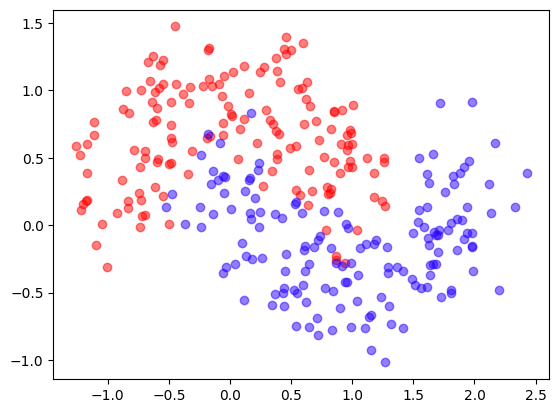

In [4]:
mlutils.plot_2Ddata(X,y)

In [7]:
def get_model(num_classes=2, nlayers=3, lsize=64, compile=True, dropout=None):
    print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(2,), name="input_1")

    layers = inputs
    for _ in range(nlayers):
        layers = tf.keras.layers.Dense(lsize, activation=tf.nn.relu)(layers)
        if dropout is not None:
            layers = tf.keras.layers.Dropout(dropout)(layers)

    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [8]:
model = get_model()
model.summary()

using 2 classes


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,642 (33.76 KB)

 Trainable params: 8,642 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X, y, epochs=20, batch_size=8, verbose=False)
model.evaluate(X,y);

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9073 - loss: 0.2015  


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


(np.float64(0.455775), np.float64(0.544225))

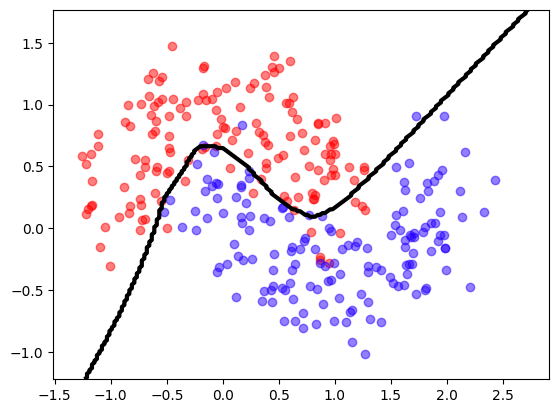

In [10]:
predict = lambda X: model.predict(X).argmax(axis=1)
mlutils.plot_2Ddata_with_boundary(predict, X,y)

In [11]:
model = get_model(dropout=0.3)
model.summary()

using 2 classes


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,642 (33.76 KB)

 Trainable params: 8,642 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X, y, epochs=20, batch_size=8, verbose=False)
model.evaluate(X,y);

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9159 - loss: 0.2419  


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


(np.float64(0.4963), np.float64(0.5037))

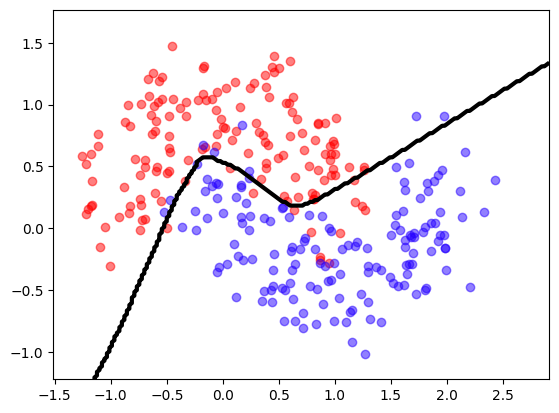

In [13]:
predict = lambda X: model.predict(X).argmax(axis=1)
mlutils.plot_2Ddata_with_boundary(predict, X,y)

In [14]:
model = get_model(nlayers=1, lsize=2, dropout=0.5)
model.summary()

using 2 classes


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X, y, epochs=20, batch_size=8, verbose=False)
model.evaluate(X,y);

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7754 - loss: 0.5600  


In [16]:
model.layers

[<InputLayer name=input_1, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=output_1, built=True>]

observe the Dropout layer is used during training but has no weights

In [17]:
inp, l1, d, outp = model.layers
d.trainable, d.weights

(True, [])

but it is only used during training (default is `training=False`)

In [18]:
model(X[:2], training=False)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.66632426, 0.33367577],
       [0.66282284, 0.3371772 ]], dtype=float32)>

In [19]:
model(X[:2], training=True) # each execution may be different

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.8507542 , 0.14924584],
       [0.41160962, 0.58839035]], dtype=float32)>

in inference a dropout layer is just a 1-to-1 mapping

In [20]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.5, input_shape=(2,))
data = np.arange(1,11).reshape(5, 2).astype(np.float32)
print(data)


[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
outputs = layer(data, training=False).numpy()
print(outputs)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


in training dropout randomly drops inputs and normalizes. See [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

In [22]:
outputs = layer(data, training=True).numpy()
print(outputs)

[[ 0.  0.]
 [ 0.  8.]
 [ 0. 12.]
 [14.  0.]
 [ 0.  0.]]


In [23]:
data[outputs!=0].sum() / layer.rate, outputs[outputs!=0].sum()

(np.float32(34.0), np.float32(34.0))

## Pooling

In [24]:
!wget -nc https://s3.amazonaws.com/rlx/mini_cifar.h5
import h5py
with h5py.File('mini_cifar.h5','r') as h5f:
    x_cifar = h5f["x"][:]
    y_cifar = h5f["y"][:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.25)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

--2025-09-03 22:27:28--  https://s3.amazonaws.com/rlx/mini_cifar.h5
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.202.152, 52.217.101.142, 16.15.218.156, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.202.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14803609 (14M) [binary/octet-stream]
Saving to: ‘mini_cifar.h5’

mini_cifar.h5       100%[===================>]  14.12M  60.3MB/s    in 0.2s    

2025-09-03 22:27:28 (60.3 MB/s) - ‘mini_cifar.h5’ saved [14803609/14803609]

(2253, 32, 32, 3) (2253,) (751, 32, 32, 3) (751,)


In [25]:
def get_conv_model(num_classes=3, img_size=32, use_maxpooling=True, compile=True):
    print ("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(15,(5,5), activation="relu")(inputs)
    if use_maxpooling:
        layers = tf.keras.layers.MaxPool2D((2,2), name="pooling")(layers)
    layers = tf.keras.layers.Conv2D(60,(5,5), activation="relu")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

observe the size of the models with and without pooling

In [26]:
model = get_conv_model(use_maxpooling=False)
model.summary()

using 3 classes


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 15)     │         1,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34560)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │       552,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576,727 (2.20 MB)

 Trainable params: 576,727 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model = get_conv_model(use_maxpooling=True)
model.summary()

using 3 classes


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 15)     │         1,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling (MaxPooling2D)          │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 60)     │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │        96,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,767 (467.84 KB)

 Trainable params: 119,767 (467.84 KB)

 Non-trainable params: 0 (0.00 B)

observe the layer has no weights

In [28]:
p = model.get_layer('pooling')
p.trainable, p.weights

(True, [])

the layer can be applied anywhere there is a 2D structure

In [29]:
x_cifar[:1].shape, p(x_cifar[:1]).shape

((1, 32, 32, 3), TensorShape([1, 16, 16, 3]))

observe how the max is computed over each pixel and over each channel

In [30]:
# a random position
i,j = np.random.randint(16, size=2)*2

x_cifar[:1][0,i:i+2,j:j+2]

array([[[0.76078431, 0.72941176, 0.72156863],
        [0.85882353, 0.82745098, 0.81960784]],

       [[0.68627451, 0.65490196, 0.64705882],
        [0.78823529, 0.75294118, 0.74509804]]])

In [31]:
p(x_cifar[:1])[0,i//2,j//2,:]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.85882354, 0.827451  , 0.81960785], dtype=float32)>